In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### CONSIGNA: Leer los set de datos w_data.csv y p_data.csv, fusionarlos a partir de la variable que tengan en común (ID)y realizar los siguientes ejercicios:

In [ ]:
#leo los csv y los convierto en dataframes
w_data = pd.read_csv('/content/drive/MyDrive/Data Science - CoderHouse/Desafío Clase 28 - Data Wrangling II/w_data.csv', sep = ';')
p_data = pd.read_csv('/content/drive/MyDrive/Data Science - CoderHouse/Desafío Clase 28 - Data Wrangling II/p_data.csv', sep=';')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
w_data.head()

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target
0,State-gov,77516.0,2174.0,0.0,40.0,49084,<=50K
1,Self-emp-not-inc,83311.0,0.0,0.0,13.0,68553,<=50K
2,Private,215646.0,0.0,0.0,40.0,143654,<=50K
3,Private,234721.0,0.0,0.0,40.0,41510,<=50K
4,Private,338409.0,0.0,0.0,40.0,195025,<=50K


In [ ]:
p_data.head()

,Age,Sex,ID,Race,Country,Education,Education-Num,Marital Status,Relationship
0,39.0,Male,49084,White,United-States,Bachelors,13.0,Never-married,Not-in-family
1,50.0,Male,68553,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband
2,38.0,Male,143654,White,United-States,HS-grad,9.0,Divorced,Not-in-family
3,53.0,Male,41510,Black,United-States,11th,7.0,Married-civ-spouse,Husband
4,28.0,Female,195025,Black,Cuba,Bachelors,13.0,Married-civ-spouse,Wife


In [ ]:
# Con el atributo indicator, se agrega una columna que etiqueta de que dataframe proviene cada registro en base a la key seleccionada (on='ID'), 
# si en ambos, o solo uno
df = pd.merge(w_data, p_data, on='ID', how='outer', indicator='union')

In [ ]:
df

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target,Age,Sex,Race,Country,Education,Education-Num,Marital Status,Relationship,union
0,State-gov,77516.0,2174.0,0.0,40.0,49084,<=50K,39.0,Male,White,United-States,Bachelors,13.0,Never-married,Not-in-family,both
1,Self-emp-not-inc,83311.0,0.0,0.0,13.0,68553,<=50K,50.0,Male,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband,both
2,Private,215646.0,0.0,0.0,40.0,143654,<=50K,38.0,Male,White,United-States,HS-grad,9.0,Divorced,Not-in-family,both
3,Private,234721.0,0.0,0.0,40.0,41510,<=50K,53.0,Male,Black,United-States,11th,7.0,Married-civ-spouse,Husband,both
4,Private,338409.0,0.0,0.0,40.0,195025,<=50K,28.0,Female,Black,Cuba,Bachelors,13.0,Married-civ-spouse,Wife,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,Private,215419.0,0.0,0.0,36.0,735617153,<=50K.,39.0,Female,White,United-States,Bachelors,13.0,Divorced,Not-in-family,both
48839,?,321403.0,0.0,0.0,40.0,1131807446,<=50K.,64.0,Male,Black,United-States,HS-grad,9.0,Widowed,Other-relative,both
48840,Private,374983.0,0.0,0.0,50.0,781422087,<=50K.,38.0,Male,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband,both
48841,Private,83891.0,5455.0,0.0,40.0,161771296,<=50K.,44.0,Male,Asian-Pac-Islander,United-States,Bachelors,13.0,Divorced,Own-child,both


## 1 - Cuantos ID tienen en común. Nombrar cuales no tienen en común

In [ ]:
# Muestro solo los registros comunes en ambos dataframes
df[df.union=='both']

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target,Age,Sex,Race,Country,Education,Education-Num,Marital Status,Relationship,union
0,State-gov,77516.0,2174.0,0.0,40.0,49084,<=50K,39.0,Male,White,United-States,Bachelors,13.0,Never-married,Not-in-family,both
1,Self-emp-not-inc,83311.0,0.0,0.0,13.0,68553,<=50K,50.0,Male,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband,both
2,Private,215646.0,0.0,0.0,40.0,143654,<=50K,38.0,Male,White,United-States,HS-grad,9.0,Divorced,Not-in-family,both
3,Private,234721.0,0.0,0.0,40.0,41510,<=50K,53.0,Male,Black,United-States,11th,7.0,Married-civ-spouse,Husband,both
4,Private,338409.0,0.0,0.0,40.0,195025,<=50K,28.0,Female,Black,Cuba,Bachelors,13.0,Married-civ-spouse,Wife,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,Private,245211.0,0.0,0.0,40.0,597186815,<=50K.,33.0,Male,White,United-States,Bachelors,13.0,Never-married,Own-child,both
48838,Private,215419.0,0.0,0.0,36.0,735617153,<=50K.,39.0,Female,White,United-States,Bachelors,13.0,Divorced,Not-in-family,both
48839,?,321403.0,0.0,0.0,40.0,1131807446,<=50K.,64.0,Male,Black,United-States,HS-grad,9.0,Widowed,Other-relative,both
48840,Private,374983.0,0.0,0.0,50.0,781422087,<=50K.,38.0,Male,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband,both


Vemos que los valores de ID comunes en ambos DataFrames son **48.842**

In [ ]:
# Seleccionando los registros con el valor 'left_only' vemos que
# el registro con ID 1344995623	no es comun en ambos DF, solo de w_data
df[df.union=='left_only'] 

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target,Age,Sex,Race,Country,Education,Education-Num,Marital Status,Relationship,union
48842,Self-emp-inc,182148.0,0.0,0.0,60.0,1344995623,>50K.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [ ]:
# No hay registros provenientes solo de p_data
df[df.union=='right_only']

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target,Age,Sex,Race,Country,Education,Education-Num,Marital Status,Relationship,union


In [ ]:
# Para dejar al dataframe en su estructura original, eliminamos la columna union
df.drop(columns='union')

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target,Age,Sex,Race,Country,Education,Education-Num,Marital Status,Relationship
0,State-gov,77516.0,2174.0,0.0,40.0,49084,<=50K,39.0,Male,White,United-States,Bachelors,13.0,Never-married,Not-in-family
1,Self-emp-not-inc,83311.0,0.0,0.0,13.0,68553,<=50K,50.0,Male,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband
2,Private,215646.0,0.0,0.0,40.0,143654,<=50K,38.0,Male,White,United-States,HS-grad,9.0,Divorced,Not-in-family
3,Private,234721.0,0.0,0.0,40.0,41510,<=50K,53.0,Male,Black,United-States,11th,7.0,Married-civ-spouse,Husband
4,Private,338409.0,0.0,0.0,40.0,195025,<=50K,28.0,Female,Black,Cuba,Bachelors,13.0,Married-civ-spouse,Wife
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,Private,215419.0,0.0,0.0,36.0,735617153,<=50K.,39.0,Female,White,United-States,Bachelors,13.0,Divorced,Not-in-family
48839,?,321403.0,0.0,0.0,40.0,1131807446,<=50K.,64.0,Male,Black,United-States,HS-grad,9.0,Widowed,Other-relative
48840,Private,374983.0,0.0,0.0,50.0,781422087,<=50K.,38.0,Male,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband
48841,Private,83891.0,5455.0,0.0,40.0,161771296,<=50K.,44.0,Male,Asian-Pac-Islander,United-States,Bachelors,13.0,Divorced,Own-child


## 2- Corregir los target a solo dos valores distintos ‘<=50k’ y ‘>50k’

In [ ]:
# Agrupo por los diferentes valores de la columna 'Target'
df.groupby(by=df['Target']).count()

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Age,Sex,Race,Country,Education,Education-Num,Marital Status,Relationship,union
Target,,,,,,,,,,,,,,,
<=50K,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720
<=50K.,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435
>50K,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841
>50K.,3846,3846,3846,3846,3846,3846,3845,3845,3845,3845,3845,3845,3845,3845,3846


In [ ]:
# Corregimos el primer grupo reemplazando los valores '<=50K." con el punto extra por el mismo valor sin el punto
df['Target'] = df['Target'].str.replace('<=50K.', '<=50K')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
# Corregimos el segundo grupo reemplazando los valores '>50K.' con el punto extra por el mismo valor sin el punto
df['Target'] = df['Target'].str.replace('>50K.','>50K')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
# Volvemos a revisar el dataset agrupando por la columna 'Target'
df.groupby(by=df['Target']).count()

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Age,Sex,Race,Country,Education,Education-Num,Marital Status,Relationship,union
Target,,,,,,,,,,,,,,,
<=50K,37155,37155,37155,37155,37155,37155,37155,37155,37155,37155,37155,37155,37155,37155,37155
>50K,11687,11687,11687,11687,11687,11687,11686,11686,11686,11686,11686,11686,11686,11686,11687


## 3- Calcular la proporción que hay entre personas con salarios >50k respecto del total para entre personas de distinto sexo, Raza y Educacion. 
### Por ejemplo: cuál es el porcentaje de mujeres con un salario mayor a 50K y compararlo con el de los hombres. Lo mismo para personas de distintas razas y Educación

### **Salario >50k -> Mujeres VS Hombres**

### Primer intento con limpieza de datos

In [ ]:
# Cuento como es la división del salario del total del dataframe
df['Target'].value_counts()

 <=50K    37155
 >50K     11687
Name: Target, dtype: int64

In [ ]:
# Cuento como es la división de mujeres y hombres del total del dataframe
df['Sex'].value_counts()

 Male      32649
 Female    16192
Name: Sex, dtype: int64

In [ ]:
# Agrupo primero por sexo y luego por salario (Columna 'Target')
df.groupby(['Sex','Target'])['Target'].count()

Sex      Target
 Female   <=50K    14423
          >50K      1769
 Male     <=50K    22732
          >50K      9917
Name: Target, dtype: int64

In [ ]:
# A la inversa, agrupo primero por salario y luego por sexo para verificar
df.groupby(['Target','Sex'])['Sex'].count()

Target  Sex    
 <=50K   Female    14423
         Male      22732
 >50K    Female     1769
         Male       9917
Name: Sex, dtype: int64

In [ ]:
# Intento seleccionar solo las mujeres y retorna Dataframe vacio
df[df['Sex'] == 'Female']

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target,Age,Sex,Race,Country,Education,Education-Num,Marital Status,Relationship,union


In [ ]:
# Con los hombres lo mismo

df[df['Sex'] == 'Male']

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target,Age,Sex,Race,Country,Education,Education-Num,Marital Status,Relationship,union


In [ ]:
# Despues de MUCHO tiempo probando por qué no podia seleccionar las columnas 'Sex' y 'Target' correctamente, resulta que los valores están almacenados con un espacio al inicio

df[df['Sex'] == ' Female'].head()

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target,Age,Sex,Race,Country,Education,Education-Num,Marital Status,Relationship,union
4,Private,338409.0,0.0,0.0,40.0,195025,<=50K,28.0,Female,Black,Cuba,Bachelors,13.0,Married-civ-spouse,Wife,both
5,Private,284582.0,0.0,0.0,40.0,231557,<=50K,37.0,Female,White,United-States,Masters,14.0,Married-civ-spouse,Wife,both
6,Private,160187.0,0.0,0.0,16.0,393526,<=50K,49.0,Female,Black,Jamaica,9th,5.0,Married-spouse-absent,Not-in-family,both
8,Private,45781.0,14084.0,0.0,50.0,7496,>50K,31.0,Female,White,United-States,Masters,14.0,Never-married,Not-in-family,both
12,Private,122272.0,0.0,0.0,30.0,672660,<=50K,23.0,Female,White,United-States,Bachelors,13.0,Never-married,Own-child,both


In [ ]:
df[df['Sex'] == ' Male'].head()

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target,Age,Sex,Race,Country,Education,Education-Num,Marital Status,Relationship,union
0,State-gov,77516.0,2174.0,0.0,40.0,49084,<=50K,39.0,Male,White,United-States,Bachelors,13.0,Never-married,Not-in-family,both
1,Self-emp-not-inc,83311.0,0.0,0.0,13.0,68553,<=50K,50.0,Male,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband,both
2,Private,215646.0,0.0,0.0,40.0,143654,<=50K,38.0,Male,White,United-States,HS-grad,9.0,Divorced,Not-in-family,both
3,Private,234721.0,0.0,0.0,40.0,41510,<=50K,53.0,Male,Black,United-States,11th,7.0,Married-civ-spouse,Husband,both
7,Self-emp-not-inc,209642.0,0.0,0.0,45.0,488425,>50K,52.0,Male,White,United-States,HS-grad,9.0,Married-civ-spouse,Husband,both


In [ ]:
df[df['Target'] == ' >50K'].head()

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target,Age,Sex,Race,Country,Education,Education-Num,Marital Status,Relationship,union
7,Self-emp-not-inc,209642.0,0.0,0.0,45.0,488425,>50K,52.0,Male,White,United-States,HS-grad,9.0,Married-civ-spouse,Husband,both
8,Private,45781.0,14084.0,0.0,50.0,7496,>50K,31.0,Female,White,United-States,Masters,14.0,Never-married,Not-in-family,both
9,Private,159449.0,5178.0,0.0,40.0,576313,>50K,42.0,Male,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband,both
10,Private,280464.0,0.0,0.0,80.0,293735,>50K,37.0,Male,Black,United-States,Some-college,10.0,Married-civ-spouse,Husband,both
11,State-gov,141297.0,0.0,0.0,40.0,109140,>50K,30.0,Male,Asian-Pac-Islander,India,Bachelors,13.0,Married-civ-spouse,Husband,both


In [ ]:
df[df['Target'] == ' <=50K'].head()

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target,Age,Sex,Race,Country,Education,Education-Num,Marital Status,Relationship,union
0,State-gov,77516.0,2174.0,0.0,40.0,49084,<=50K,39.0,Male,White,United-States,Bachelors,13.0,Never-married,Not-in-family,both
1,Self-emp-not-inc,83311.0,0.0,0.0,13.0,68553,<=50K,50.0,Male,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband,both
2,Private,215646.0,0.0,0.0,40.0,143654,<=50K,38.0,Male,White,United-States,HS-grad,9.0,Divorced,Not-in-family,both
3,Private,234721.0,0.0,0.0,40.0,41510,<=50K,53.0,Male,Black,United-States,11th,7.0,Married-civ-spouse,Husband,both
4,Private,338409.0,0.0,0.0,40.0,195025,<=50K,28.0,Female,Black,Cuba,Bachelors,13.0,Married-civ-spouse,Wife,both


In [ ]:
# Limpiamos el error con la función strip, en todas las columnas de tipo string que vamos a utilizar

df['Sex'] = df['Sex'].str.strip()
df['Target'] = df['Target'].str.strip()
df['Race'] = df['Race'].str.strip()
df['Education'] = df['Education'].str.strip()

In [ ]:
# Ahora todas las columnas funcionan
df[df['Sex'] == 'Female'].head()

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target,Age,Sex,Race,Country,Education,Education-Num,Marital Status,Relationship,union
4,Private,338409.0,0.0,0.0,40.0,195025,<=50K,28.0,Female,Black,Cuba,Bachelors,13.0,Married-civ-spouse,Wife,both
5,Private,284582.0,0.0,0.0,40.0,231557,<=50K,37.0,Female,White,United-States,Masters,14.0,Married-civ-spouse,Wife,both
6,Private,160187.0,0.0,0.0,16.0,393526,<=50K,49.0,Female,Black,Jamaica,9th,5.0,Married-spouse-absent,Not-in-family,both
8,Private,45781.0,14084.0,0.0,50.0,7496,>50K,31.0,Female,White,United-States,Masters,14.0,Never-married,Not-in-family,both
12,Private,122272.0,0.0,0.0,30.0,672660,<=50K,23.0,Female,White,United-States,Bachelors,13.0,Never-married,Own-child,both


### Pasamos a un nuevo df solo los registros de personas con un salario mayor a 50K para trabajar mejor todas las agregaciones después

In [ ]:
more50K = df[df['Target'] == '>50K']

In [ ]:
more50K.count()

Workclass         11687
fnlwgt            11687
Capital Gain      11687
Capital Loss      11687
Hours per week    11687
ID                11687
Target            11687
Age               11686
Sex               11686
Race              11686
Country           11686
Education         11686
Education-Num     11686
Marital Status    11686
Relationship      11686
union             11687
dtype: int64

### **Salario >50k -> Mujeres VS Hombres**

In [ ]:
# Cantidad total de empleados
totalEmpleados = df['Sex'].count()
print('Total employee count is ' + str(totalEmpleados))

# Cantidad total de mujeres
femaleTotal = df[df['Sex']=='Female']['Sex'].count()
print('Female total count is ' + str(femaleTotal))

# Cantidad total de hombres
maleTotal = df[df['Sex']=='Male']['Sex'].count()
print('Male total count is ' + str(maleTotal))

Total employee count is 48841
Female total count is 16192
Male total count is 32649


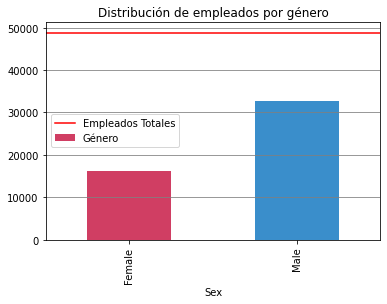

In [ ]:
sexDistribution = df.groupby('Sex').size().plot(kind='bar', label='Género', color=['#D03E63', '#3A8ECB'])
sexDistribution.set_title('Distribución de empleados por género')
sexDistribution.axes.grid(b=True, axis='y', color='gray')
sexDistribution.axhline(totalEmpleados, color='red', label='Empleados Totales')
sexDistribution.legend()

In [ ]:
# Cantidad total de personas con salario >50K
more50Ktotal = more50K['Sex'].count()
print('Salary >50K total count is ' + str(more50Ktotal))

# Cantidad de mujeres con salario >50K
more50Kfemale = more50K[more50K['Sex']=='Female']['Sex'].count()
print('Women with salary >50K total count is ' + str(more50Kfemale))

# Cantidad de hombres con salario >50K
more50Kmale = more50K[more50K['Sex']=='Male']['Sex'].count()
print('Men with salary >50K total count is ' + str(more50Kmale))

Salary >50K total count is 11686
Women with salary >50K total count is 1769
Men with salary >50K total count is 9917


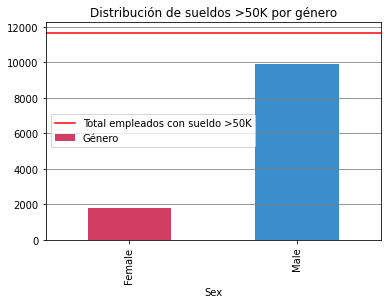

In [ ]:
more50KsexDistribution = more50K.groupby('Sex').size().plot(kind='bar', label='Género', color=['#D03E63', '#3A8ECB'])
more50KsexDistribution.set_title('Distribución de sueldos >50K por género')
more50KsexDistribution.axes.grid(b=True, axis='y', color='gray')
more50KsexDistribution.axhline(more50Ktotal, color='red', label='Total empleados con sueldo >50K')
more50KsexDistribution.legend(loc='center left')

In [ ]:
# Porcentaje de hombres y mujeres dentro de los empleados con salarios mayores a 50K - Manera 1, larga pero la primera que razoné
more50KfemalePercfromTotal50K = round( ( more50Kfemale / more50Ktotal * 100), ndigits=2 )
more50KmalePercfromTotal50K = round( ( more50Kmale / more50Ktotal * 100), ndigits=2 )
print(more50KfemalePercfromTotal50K)
print(more50KmalePercfromTotal50K)

15.14
84.86


In [ ]:
# Lo mismo pero de forma corta
round( ((more50K['Sex'].value_counts() / len(more50K))*100 ), ndigits=2)

Male      84.85
Female    15.14
Name: Sex, dtype: float64

En proporción, el 15.14% de los salarios mayores a 50K pertenecen a mujeres, y el 84.86% pertenecen a hombres


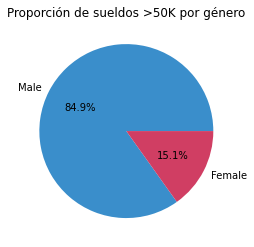

In [ ]:
sexPieChart50K = more50K['Sex'].value_counts().plot(kind='pie', label='', autopct = '%.1f%%', colors=['#3A8ECB', '#D03E63'])
sexPieChart50K.set_title('Proporción de sueldos >50K por género')
# Las proximas dos lineas no son necesarias ahora que está el atributo autopct
#sexPieChart50K.text(0.4, -0.3, '{}%'.format(more50KfemalePercfromTotal50K))
#sexPieChart50K.text(-0.5, 0.3, '{}%'.format(more50KmalePercfromTotal50K))
print('En proporción, el {}% de los salarios mayores a 50K pertenecen a mujeres, y el {}% pertenecen a hombres'.format(more50KfemalePercfromTotal50K, more50KmalePercfromTotal50K))

In [ ]:
'''Esta parte no es necesaria segun la consigna pero me pareció interesante analizarla'''

# Porcentaje de salarios mayores a 50K entre el total de mujeres y el total de hombres - Forma Larga
more50KfemalePercfromTotalWomen = round( ( more50Kfemale / femaleTotal * 100), ndigits=2 )
more50KmalePercfromTotalMen = round( ( more50Kmale / maleTotal * 100), ndigits=2 )

In [ ]:
# Porcentaje de salarios mayores a 50K entre el total de mujeres y el total de hombres - Forma Corta
round( ((more50K['Sex'].value_counts() / len(df[df['Sex']=='Female']))*100 ), ndigits=2)

Male      61.25
Female    10.93
Name: Sex, dtype: float64

A su vez, solo el 10.93% del total de empleadas mujeres tienen un salario mayor a 50K...


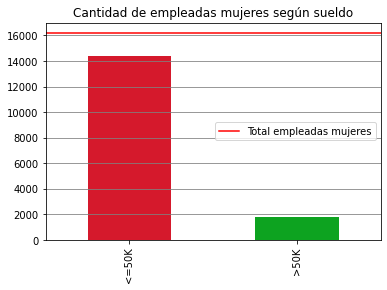

In [ ]:
sexPieChartWomen = df[df['Sex']=='Female']['Target'].value_counts().plot(kind='bar', label='', color=['#D5192C', '#0DA320'])
sexPieChartWomen.set_title('Cantidad de empleadas mujeres según sueldo')
sexPieChartWomen.axes.grid(b=True, axis='y', color='gray')
sexPieChartWomen.axhline(femaleTotal, color='red', label='Total empleadas mujeres')
sexPieChartWomen.legend()

print('A su vez, solo el {}% del total de empleadas mujeres tienen un salario mayor a 50K...'.format(more50KfemalePercfromTotalWomen))

...mientras que un 30.37% del total de los empleados hombres tienen un salario mayor a 50K


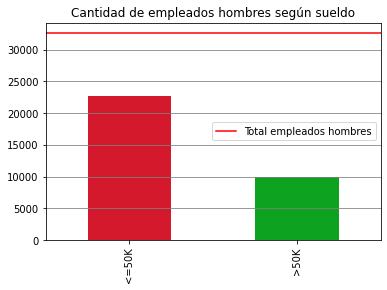

In [ ]:
sexPieChartMen = df[df['Sex']=='Male']['Target'].value_counts().plot(kind='bar', label='', color=['#D5192C', '#0DA320'])
sexPieChartMen.set_title('Cantidad de empleados hombres según sueldo')
sexPieChartMen.axes.grid(b=True, axis='y', color='gray')
sexPieChartMen.axhline(maleTotal, color='red', label='Total empleados hombres')
sexPieChartMen.legend()

print('...mientras que un {}% del total de los empleados hombres tienen un salario mayor a 50K'.format(more50KmalePercfromTotalMen))

### **Raza > 50K**

In [ ]:
'''# Cantidad total de empleados (No lo vamos a repetir, ya existe)
totalEmpleados = df['Race'].count()'''
print('Total employee count is ' + str(totalEmpleados))

# Primero tenemos que ver cuantas variables tenemos en la columna 'Race'
df['Race'].value_counts()

Total employee count is 48841


White                 41761
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: Race, dtype: int64

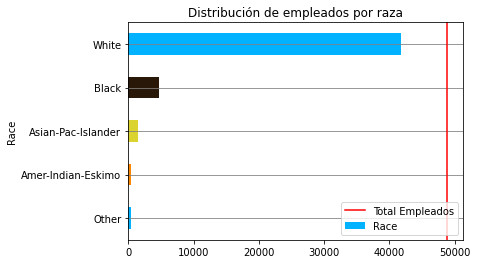

In [ ]:
RaceDistribution = df.groupby('Race').size().sort_values().plot(kind='barh', label='Race', color=['#00B2FF', '#FD8600', '#DBD32F', '#291808'])
RaceDistribution.set_title('Distribución de empleados por raza')
RaceDistribution.axes.grid(b=True, axis='y', color='gray')
RaceDistribution.axvline(totalEmpleados, color='red', label='Total Empleados')
RaceDistribution.legend(loc='lower right')

In [ ]:
''' Cantidad total de empleados con salario >50K (No lo vamos a repetir, ya existe)
more50Ktotal = more50K['Race'].count()'''
print('Salary >50K total count is ' + str(more50Ktotal))

more50K['Race'].value_counts()

Salary >50K total count is 11686


White                 10606
Black                   566
Asian-Pac-Islander      409
Amer-Indian-Eskimo       55
Other                    50
Name: Race, dtype: int64

In [ ]:
# Porcentaje de hombres y mujeres dentro de los empleados con salarios mayores a 50K - Forma larga(No corre porque no inicialicé las variablesd)
# more50KWhitePerc = round( ( more50KWhite / more50Ktotal * 100), ndigits=2 )
# more50KBlackPerc = round( ( more50KBlack / more50Ktotal * 100), ndigits=2 )
# more50KAsianPerc = round( ( more50KAsian / more50Ktotal * 100), ndigits=2 )
# more50KIndianPerc = round( ( more50KIndian / more50Ktotal * 100), ndigits=2 )
# more50KOtherRacePerc = round( ( more50KOtherRace / more50Ktotal * 100), ndigits=2 ) '''

In [ ]:
print('Estas cantidades representan, respectivamente, el siguiente porcentaje del total de empleados con sueldos >50K:')
round( ((more50K['Race'].value_counts() / len(more50K))*100 ), ndigits=2)

Estas cantidades representan, respectivamente, el siguiente porcentaje del total de empleados con sueldos >50K:


White                 90.75
Black                  4.84
Asian-Pac-Islander     3.50
Amer-Indian-Eskimo     0.47
Other                  0.43
Name: Race, dtype: float64

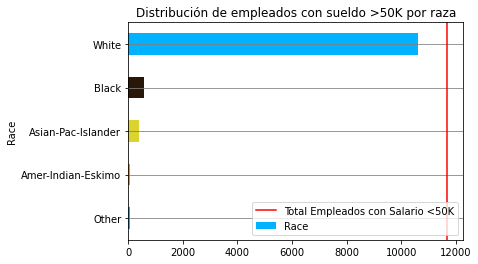

In [ ]:
more50KRaceDistribution = more50K.groupby('Race').size().sort_values().plot(kind='barh', label='Race', color=['#00B2FF', '#FD8600', '#DBD32F', '#291808'])
more50KRaceDistribution.set_title('Distribución de empleados con sueldo >50K por raza')
more50KRaceDistribution.axes.grid(b=True, axis='y', color='gray')
more50KRaceDistribution.axvline(more50Ktotal, color='red', label='Total Empleados con Salario <50K')
more50KRaceDistribution.legend(loc='lower right')

### **Educación > 50K**

In [ ]:
'''# Cantidad total de empleados (No lo vamos a repetir, ya existe)
totalEmpleados = df['Education'].count()'''
print('Total employee count is ' + str(totalEmpleados))

# Primero tenemos que ver cuantas variables tenemos en la columna 'Education'
df['Education'].value_counts()

Total employee count is 48841


HS-grad         15784
Some-college    10878
Bachelors        8024
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: Education, dtype: int64

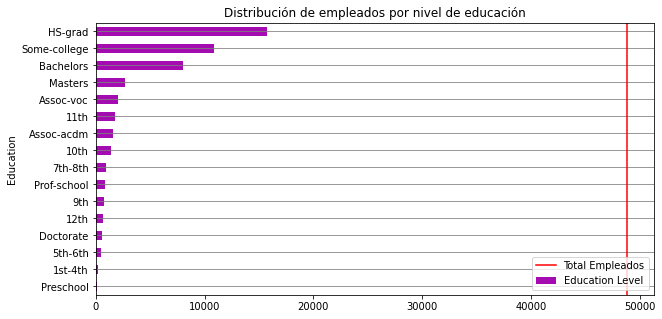

In [ ]:
EducationDistribution = df.groupby('Education').size().sort_values().plot(kind='barh', label='Education Level', figsize=(10,5), color=['#A40CB2'])
EducationDistribution.set_title('Distribución de empleados por nivel de educación')
EducationDistribution.axes.grid(b=True, axis='y', color='gray')
EducationDistribution.axvline(totalEmpleados, color='red', label='Total Empleados')
EducationDistribution.legend(loc='lower right')


In [ ]:
print('Estas cantidades representan, respectivamente, el siguiente porcentaje del total de empleados:')
round( ((df['Education'].value_counts() / len(df))*100 ), ndigits=2)

Estas cantidades representan, respectivamente, el siguiente porcentaje del total de empleados:


HS-grad         32.32
Some-college    22.27
Bachelors       16.43
Masters          5.44
Assoc-voc        4.22
11th             3.71
Assoc-acdm       3.28
10th             2.84
7th-8th          1.96
Prof-school      1.71
9th              1.55
12th             1.35
Doctorate        1.22
5th-6th          1.04
1st-4th          0.51
Preschool        0.17
Name: Education, dtype: float64

In [ ]:
''' Cantidad total de empleados con salario >50K (No lo vamos a repetir, ya existe)
more50Ktotal = more50K['Education'].count()'''
print('Salary >50K total count is ' + str(more50Ktotal))

more50K['Education'].value_counts()

Salary >50K total count is 11686


Bachelors       3312
HS-grad         2503
Some-college    2063
Masters         1459
Prof-school      617
Assoc-voc        522
Doctorate        431
Assoc-acdm       413
11th              92
10th              87
7th-8th           62
12th              48
9th               41
5th-6th           27
1st-4th            8
Preschool          1
Name: Education, dtype: int64

In [ ]:
print('Estas cantidades representan, respectivamente, el siguiente porcentaje del total de empleados con sueldos >50K:')
round( ((more50K['Education'].value_counts() / len(more50K))*100 ), ndigits=2)

Estas cantidades representan, respectivamente, el siguiente porcentaje del total de empleados con sueldos >50K:


Bachelors       28.34
HS-grad         21.42
Some-college    17.65
Masters         12.48
Prof-school      5.28
Assoc-voc        4.47
Doctorate        3.69
Assoc-acdm       3.53
11th             0.79
10th             0.74
7th-8th          0.53
12th             0.41
9th              0.35
5th-6th          0.23
1st-4th          0.07
Preschool        0.01
Name: Education, dtype: float64

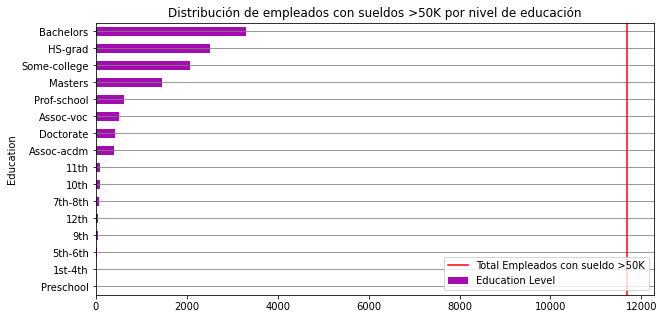

In [ ]:
more50KEducationDistribution = more50K.groupby('Education').size().sort_values().plot(kind='barh', label='Education Level', figsize=(10,5), color=['#A40CB2'])
more50KEducationDistribution.set_title('Distribución de empleados con sueldos >50K por nivel de educación')
more50KEducationDistribution.axes.grid(b=True, axis='y', color='gray')
more50KEducationDistribution.axvline(more50Ktotal, color='red', label='Total Empleados con sueldo >50K')
more50KEducationDistribution.legend(loc='lower right')